In [1]:
import keras
import pandas as pd
import seaborn as sns
import sklearn as sk
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('/kaggle/input/data-science-london-scikit-learn/train.csv', header=None)
df_label = pd.read_csv('/kaggle/input/data-science-london-scikit-learn/trainLabels.csv', header=None)[0]
df_test = pd.read_csv('/kaggle/input/data-science-london-scikit-learn/test.csv', header=None)

In [4]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,-1.408370,1.114744,0.910415,2.218110,4.305643,0.088924,0.169149,0.413448,1.513862,2.662967,-1.072765,0.149111,0.559579,4.378885,-0.463603,-0.063959,0.544930,0.712772,-1.494050,-2.636169,-0.850465,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,0.935347,1.057796,-0.539275,-0.172662,-0.679051,0.607362,1.148635,2.437077,-0.313069,0.528104,-0.513476,0.766221,-1.466939,-2.318885,1.647223,-1.556443,-1.645581,-0.198467,-1.472066,-1.906147,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,-0.890270,0.909969,-11.851312,3.352420,-4.862125,-0.903317,-1.824344,0.045446,-2.126474,1.161563,-1.027912,-1.078792,1.848525,3.758918,0.623649,-0.091044,-1.033094,-0.254151,-4.377542,-1.196298,-0.604501,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,-0.713474,-0.136399,0.058990,-1.083458,1.622659,-1.685582,-1.222879,-0.215834,0.155612,0.627873,-0.732789,1.337941,1.335689,0.680062,0.504754,1.204808,0.144477,0.673993,1.027921,3.073382,1.022959,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,-0.416575,0.433862,-12.822821,-0.048248,-5.031497,-0.704413,0.515952,-2.635899,-2.359881,-0.053400,0.741432,1.573043,0.723686,1.735602,0.335774,0.572905,0.625971,0.412084,-4.883833,-5.588332,0.513906,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.310429,0.826811,-0.952245,0.768850,1.877520,1.320646,1.944609,1.191420,-0.127724,0.070937,0.840023,-0.184389,-7.274557,-0.405542,-0.710082,-1.148152,1.386478,-0.746584,-0.745984,-1.012365,-1.032513,1.037158,2.078827,-1.536226,-0.461869,2.562710,1.310133,-0.558187,-1.520218,-1.356291,-0.600411,-0.383792,0.745596,-0.698598,-2.729937,-0.431535,0.372873,1.019092,-2.672811,-0.295141
996,-1.853879,0.246726,0.459921,-2.074267,7.599220,-0.138355,-4.501900,0.630634,-1.590533,-1.112949,0.230004,-2.002316,5.417043,-0.261304,2.593422,1.044658,-0.596086,-0.308418,3.261220,-1.327551,0.117267,-2.666928,-1.836644,-1.624403,-2.012788,0.339940,1.591863,-0.375127,-0.388139,-3.491325,0.361736,0.240052,-0.856196,-0.072481,-2.935896,0.582411,-2.613407,0.036687,2.809310,4.412567
997,0.912748,-1.734039,-1.047035,0.217573,13.457812,0.162771,-2.250521,2.216161,-0.378326,0.642114,1.880631,-0.867683,-1.951512,-0.013201,3.724396,-0.112185,-0.469752,-1.271563,0.202913,0.951436,-0.215540,0.812165,2.237102,0.696814,0.960707,1.207911,-0.104137,0.129072,-1.808959,-3.464608,1.195896,-1.073806,-2.754369,1.814864,-4.190105,-1.116441,-2.100125,0.061513,0.895536,0.813686
998,2.439780,-0.735511,-0.902426,1.365036,-10.430299,-0.856859,2.686474,0.292035,0.585388,-0.876965,0.538251,-0.122775,1.674553,1.357556,-4.599050,0.578349,-0.203504,1.059715,-4.234246,1.193436,-0.931757,1.902149,-0.432152,-1.639119,-1.919054,-0.548896,-0.960006,0.005818,2.475824,-1.602752,2.262326,-0.039488,0.773876,-0.916066,2.604827,-0.649874,-3.423674,0.229748,-2.311088,-3.422217


<Axes: xlabel='0'>

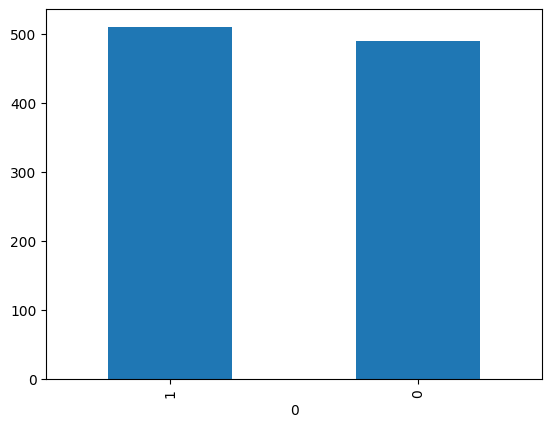

In [5]:
df_label.value_counts().plot.bar()

---

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
df_ss = StandardScaler().fit_transform(df)

---

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
import xgboost

#### ***RandomForest***

In [9]:
X_tr, X_val, y_tr, y_val = train_test_split(df_ss, df_label, test_size=0.3, random_state=1)

In [10]:
rf = RandomForestClassifier(n_estimators=100, random_state=1, n_jobs=-1, verbose=0)

In [11]:
rf.fit(X_tr, y_tr)

RandomForestClassifier(n_jobs=-1, random_state=1)

In [12]:
rf.score(X_val, y_val)

0.89

In [13]:
pred_rf = rf.predict(X_val)

In [14]:
print('F1:',f1_score(y_val, pred_rf, pos_label = 0))

F1: 0.8910891089108911


In [15]:
conf_matrix_rf = sk.metrics.confusion_matrix(y_val, pred_rf)

<Figure size 400x400 with 0 Axes>

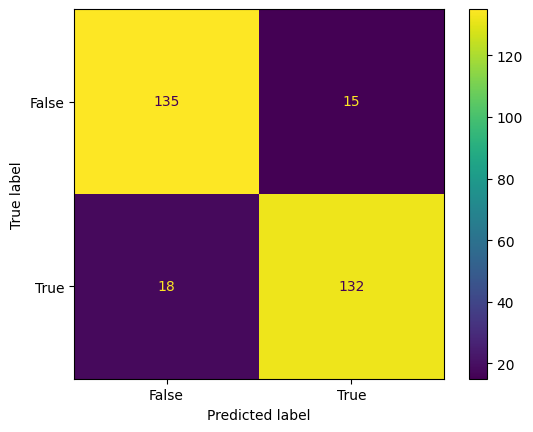

In [16]:
cm_rf = sk.metrics.ConfusionMatrixDisplay(conf_matrix_rf, display_labels=[False, True])

plt.figure(figsize=(4, 4))
cm_rf.plot()
plt.show()

In [17]:
final_pred_rf = rf.predict(df_test)

In [18]:
pd_rf_sub = pd.DataFrame(final_pred_rf, columns=['Solution'])
pd_rf_sub.insert(0, 'Id', range(1, len(df_test) + 1))
pd_rf_sub.to_csv('submission_rf.csv', index=False)

---

#### ***SVM***

In [19]:
svc_l = SVC(kernel='linear', random_state=1)
svc_r = SVC(kernel='rbf', random_state=1)

In [20]:
svc_l.fit(X_tr, y_tr)
svc_r.fit(X_tr, y_tr)

SVC(random_state=1)

In [21]:
svc_l.score(X_val, y_val)

0.8233333333333334

In [22]:
svc_r.score(X_val, y_val)

0.89

In [23]:
pred_svcl = svc_l.predict(X_val)
pred_svcr = svc_r.predict(X_val)

In [24]:
print('F1:',f1_score(y_val, pred_svcl, pos_label = 0))

F1: 0.8215488215488216


In [25]:
print('F1:',f1_score(y_val, pred_svcr, pos_label = 0))

F1: 0.8918032786885245


In [26]:
conf_matrix_svcl = sk.metrics.confusion_matrix(y_val, pred_svcl)
conf_matrix_svcr = sk.metrics.confusion_matrix(y_val, pred_svcr)

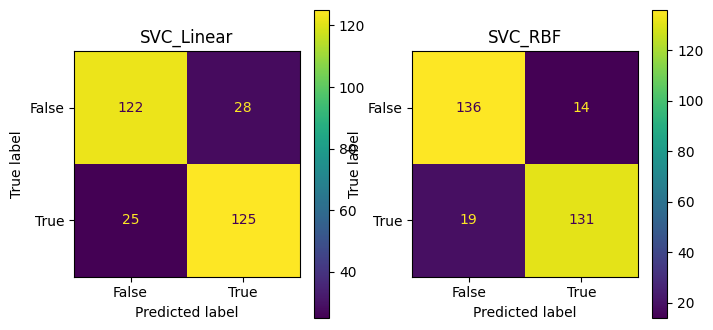

In [27]:
f, ax = plt.subplots(1, 2, figsize=(8, 4))

sk.metrics.ConfusionMatrixDisplay(conf_matrix_svcl, display_labels=[False, True]).plot(ax=ax[0])
sk.metrics.ConfusionMatrixDisplay(conf_matrix_svcr, display_labels=[False, True]).plot(ax=ax[1])

ax[0].set_title("SVC_Linear")
ax[1].set_title("SVC_RBF")

plt.show()

In [28]:
final_pred_svcl = svc_l.predict(df_test)
final_pred_svcr = svc_r.predict(df_test)

In [29]:
pd_svcl_sub = pd.DataFrame(final_pred_svcl, columns=['Solution'])
pd_svcl_sub.insert(0, 'Id', range(1, len(df_test) + 1))
pd_svcl_sub.to_csv('submission_svcl.csv', index=False)

In [30]:
pd_svcr_sub = pd.DataFrame(final_pred_svcr, columns=['Solution'])
pd_svcr_sub.insert(0, 'Id', range(1, len(df_test) + 1))
pd_svcr_sub.to_csv('submission_svcr.csv', index=False)

---

#### ***XGBoost***

In [31]:
xgb = xgboost.XGBClassifier(n_estimators=500, booster='gbtree', learning_rate=0.024, reg_lambda=1.2, n_jobs=-1)

In [32]:
xgb.fit(X_tr, y_tr)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.024, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [33]:
xgb.score(X_val, y_val)

0.9333333333333333

In [34]:
pred_xgb = xgb.predict(X_val)

In [35]:
print('F1:',f1_score(y_val, pred_xgb, pos_label = 0))

F1: 0.9337748344370861


In [36]:
conf_matrix_xgb = sk.metrics.confusion_matrix(y_val, pred_xgb)

<Figure size 400x400 with 0 Axes>

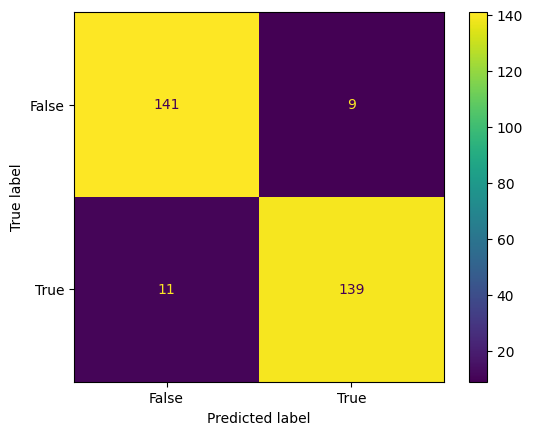

In [37]:
plt.figure(figsize=(4, 4))
sk.metrics.ConfusionMatrixDisplay(conf_matrix_xgb, display_labels=[False, True]).plot()
plt.show()

In [38]:
pd_xgb_sub = pd.DataFrame(xgb.predict(df_test), columns=['Solution'])
pd_xgb_sub.insert(0, 'Id', range(1, len(df_test) + 1))
pd_xgb_sub.to_csv('submission_xgb.csv', index=False)

---

#### ***LogisticRegression***

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
lr = LogisticRegression(random_state=1, n_jobs=-1, max_iter=1000, multi_class='ovr')

In [41]:
lr.fit(X_tr, y_tr)

LogisticRegression(max_iter=1000, multi_class='ovr', n_jobs=-1, random_state=1)

In [42]:
lr.score(X_val, y_val)

0.82

In [43]:
pred_lr = lr.predict(X_val)

In [44]:
print('F1:',f1_score(y_val, pred_lr, pos_label = 0))

F1: 0.8211920529801323


In [45]:
conf_matrix_lr = sk.metrics.confusion_matrix(y_val, pred_lr)

<Figure size 400x400 with 0 Axes>

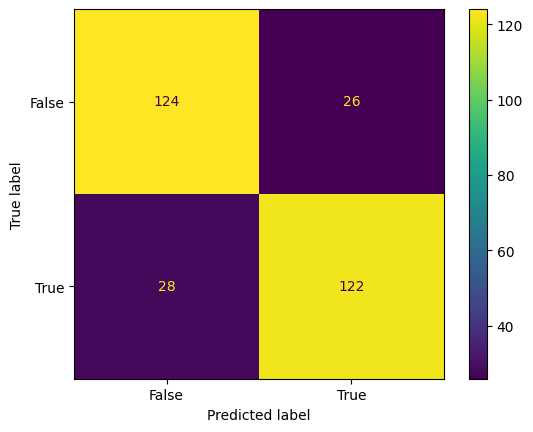

In [46]:
plt.figure(figsize=(4, 4))
sk.metrics.ConfusionMatrixDisplay(conf_matrix_lr, display_labels=[False, True]).plot()
plt.show()

In [47]:
pd_lr_sub = pd.DataFrame(lr.predict(df_test), columns=['Solution'])
pd_lr_sub.insert(0, 'Id', range(1, len(df_test) + 1))
pd_lr_sub.to_csv('submission_lr.csv', index=False)

---

#### ***GridSearchCV***

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [49]:
xgb_gcv = xgboost.XGBClassifier()
svcr_gcv = SVC()
svcl_gcv = SVC()
rf_gcv = RandomForestClassifier()
lr_gcv = LogisticRegression()
dt_gcv = DecisionTreeClassifier()

In [50]:
svc_c_rng = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

In [51]:
params_dt = {'max_depth': [x for x in range(2, 9, 2)], 'min_samples_split': [x for x in range(2, 9, 2)]}
params_xgb = {'max_depth': [x for x in range(10, 60, 10)], "min_child_weight" : [1,3,6,10], 'n_estimators': [x for x in range(100, 600, 100)]}
params_svcr = {'kernel': ['rbf'], 'gamma': svc_c_rng, 'C': svc_c_rng}
params_svcl = {'kernel': ['linear'], 'C': svc_c_rng}
params_rf = {'max_depth': [x for x in range(2, 9, 2)], 'max_features': [x for x in range(2, 9, 2)], 'n_estimators': [x for x in range(100, 600, 100)]}
params_lr = {'C': svc_c_rng}

In [52]:
gcv_dt = GridSearchCV(dt_gcv, n_jobs=-1, param_grid=params_dt, cv=10)
gcv_xgb = GridSearchCV(xgb_gcv, n_jobs=-1, param_grid=params_xgb, cv=10)
gcv_svcl = GridSearchCV(svcl_gcv, n_jobs=-1, param_grid=params_svcl, cv=10)
gcv_svcr = GridSearchCV(svcr_gcv, n_jobs=-1, param_grid=params_svcr, cv=10)
gcv_rf = GridSearchCV(rf_gcv, n_jobs=-1, param_grid=params_rf, cv=10)
gcv_lr = GridSearchCV(lr_gcv, n_jobs=-1, param_grid=params_lr, cv=10)

gcv_dt.fit(X_tr, y_tr)
gcv_xgb.fit(X_tr, y_tr)
gcv_svcr.fit(X_tr, y_tr)
gcv_svcl.fit(X_tr, y_tr)
gcv_rf.fit(X_tr, y_tr)
gcv_lr.fit(X_tr, y_tr)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                               1000.0]})

In [53]:
scores_gcv_xgb = pd.DataFrame(gcv_xgb.cv_results_)
scores_gcv_svcr = pd.DataFrame(gcv_svcr.cv_results_)
scores_gcv_svcl = pd.DataFrame(gcv_svcl.cv_results_)
scores_gcv_rf = pd.DataFrame(gcv_rf.cv_results_)
scores_gcv_lr = pd.DataFrame(gcv_lr.cv_results_)
scores_gcv_dt = pd.DataFrame(gcv_dt.cv_results_)

In [54]:
scores_gcv_xgb[['params', 'mean_test_score','rank_test_score',
           'split0_test_score', 'split1_test_score', 'split2_test_score']].sort_values(by='rank_test_score', ascending=True)

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
81,"{'max_depth': 50, 'min_child_weight': 1, 'n_es...",0.882857,1,0.857143,0.900000,0.871429
22,"{'max_depth': 20, 'min_child_weight': 1, 'n_es...",0.882857,1,0.857143,0.900000,0.857143
21,"{'max_depth': 20, 'min_child_weight': 1, 'n_es...",0.882857,1,0.857143,0.900000,0.871429
42,"{'max_depth': 30, 'min_child_weight': 1, 'n_es...",0.882857,1,0.857143,0.900000,0.857143
82,"{'max_depth': 50, 'min_child_weight': 1, 'n_es...",0.882857,1,0.857143,0.900000,0.857143
...,...,...,...,...,...,...
38,"{'max_depth': 20, 'min_child_weight': 10, 'n_e...",0.857143,96,0.842857,0.885714,0.828571
98,"{'max_depth': 50, 'min_child_weight': 10, 'n_e...",0.857143,96,0.842857,0.885714,0.828571
78,"{'max_depth': 40, 'min_child_weight': 10, 'n_e...",0.857143,96,0.842857,0.885714,0.828571
18,"{'max_depth': 10, 'min_child_weight': 10, 'n_e...",0.857143,96,0.842857,0.885714,0.828571


In [55]:
scores_gcv_svcl[['params', 'mean_test_score','rank_test_score',
           'split0_test_score', 'split1_test_score', 'split2_test_score']].sort_values(by='rank_test_score', ascending=True)

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
2,"{'C': 0.01, 'kernel': 'linear'}",0.822857,1,0.828571,0.857143,0.785714
5,"{'C': 10.0, 'kernel': 'linear'}",0.821429,2,0.857143,0.828571,0.757143
6,"{'C': 100.0, 'kernel': 'linear'}",0.821429,2,0.857143,0.828571,0.757143
7,"{'C': 1000.0, 'kernel': 'linear'}",0.821429,2,0.857143,0.828571,0.757143
3,"{'C': 0.1, 'kernel': 'linear'}",0.818571,5,0.842857,0.857143,0.771429
4,"{'C': 1.0, 'kernel': 'linear'}",0.818571,5,0.857143,0.828571,0.757143
1,"{'C': 0.001, 'kernel': 'linear'}",0.812857,7,0.857143,0.800000,0.800000
0,"{'C': 0.0001, 'kernel': 'linear'}",0.514286,8,0.514286,0.514286,0.514286


In [56]:
scores_gcv_svcr[['params', 'mean_test_score','rank_test_score',
           'split0_test_score', 'split1_test_score', 'split2_test_score']].sort_values(by='rank_test_score', ascending=True)

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
42,"{'C': 10.0, 'gamma': 0.01, 'kernel': 'rbf'}",0.870000,1,0.900000,0.885714,0.842857
58,"{'C': 1000.0, 'gamma': 0.01, 'kernel': 'rbf'}",0.857143,2,0.885714,0.885714,0.885714
50,"{'C': 100.0, 'gamma': 0.01, 'kernel': 'rbf'}",0.857143,2,0.885714,0.885714,0.885714
59,"{'C': 1000.0, 'gamma': 0.1, 'kernel': 'rbf'}",0.852857,4,0.871429,0.857143,0.814286
43,"{'C': 10.0, 'gamma': 0.1, 'kernel': 'rbf'}",0.852857,4,0.871429,0.857143,0.814286
...,...,...,...,...,...,...
27,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.514286,17,0.514286,0.514286,0.514286
28,"{'C': 0.1, 'gamma': 1.0, 'kernel': 'rbf'}",0.514286,17,0.514286,0.514286,0.514286
29,"{'C': 0.1, 'gamma': 10.0, 'kernel': 'rbf'}",0.514286,17,0.514286,0.514286,0.514286
15,"{'C': 0.001, 'gamma': 1000.0, 'kernel': 'rbf'}",0.514286,17,0.514286,0.514286,0.514286


In [57]:
scores_gcv_rf[['params', 'mean_test_score','rank_test_score',
           'split0_test_score', 'split1_test_score', 'split2_test_score']].sort_values(by='rank_test_score', ascending=True)

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
77,"{'max_depth': 8, 'max_features': 8, 'n_estimat...",0.862857,1,0.842857,0.857143,0.828571
74,"{'max_depth': 8, 'max_features': 6, 'n_estimat...",0.862857,1,0.842857,0.857143,0.842857
73,"{'max_depth': 8, 'max_features': 6, 'n_estimat...",0.862857,1,0.842857,0.885714,0.842857
68,"{'max_depth': 8, 'max_features': 4, 'n_estimat...",0.860000,4,0.842857,0.857143,0.842857
78,"{'max_depth': 8, 'max_features': 8, 'n_estimat...",0.860000,5,0.842857,0.857143,0.828571
...,...,...,...,...,...,...
4,"{'max_depth': 2, 'max_features': 2, 'n_estimat...",0.798571,75,0.800000,0.842857,0.785714
5,"{'max_depth': 2, 'max_features': 4, 'n_estimat...",0.797143,77,0.757143,0.814286,0.828571
2,"{'max_depth': 2, 'max_features': 2, 'n_estimat...",0.795714,78,0.771429,0.857143,0.800000
6,"{'max_depth': 2, 'max_features': 4, 'n_estimat...",0.791429,79,0.800000,0.800000,0.800000


In [58]:
scores_gcv_lr[['params', 'mean_test_score','rank_test_score',
           'split0_test_score', 'split1_test_score', 'split2_test_score']].sort_values(by='rank_test_score', ascending=True)

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
3,{'C': 0.1},0.821429,1,0.857143,0.814286,0.742857
4,{'C': 1.0},0.821429,1,0.871429,0.800000,0.742857
5,{'C': 10.0},0.821429,1,0.871429,0.800000,0.742857
6,{'C': 100.0},0.821429,1,0.871429,0.800000,0.742857
7,{'C': 1000.0},0.821429,1,0.871429,0.800000,0.742857
2,{'C': 0.01},0.820000,6,0.857143,0.857143,0.800000
1,{'C': 0.001},0.810000,7,0.842857,0.814286,0.814286
0,{'C': 0.0001},0.590000,8,0.542857,0.585714,0.600000


In [59]:
scores_gcv_dt[['params', 'mean_test_score','rank_test_score',
           'split0_test_score', 'split1_test_score', 'split2_test_score']].sort_values(by='rank_test_score', ascending=True)

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
13,"{'max_depth': 8, 'min_samples_split': 4}",0.751429,1,0.728571,0.714286,0.814286
14,"{'max_depth': 8, 'min_samples_split': 6}",0.745714,2,0.700000,0.714286,0.828571
8,"{'max_depth': 6, 'min_samples_split': 2}",0.742857,3,0.714286,0.785714,0.785714
15,"{'max_depth': 8, 'min_samples_split': 8}",0.742857,3,0.685714,0.742857,0.800000
9,"{'max_depth': 6, 'min_samples_split': 4}",0.738571,5,0.742857,0.757143,0.771429
12,"{'max_depth': 8, 'min_samples_split': 2}",0.737143,6,0.714286,0.714286,0.785714
5,"{'max_depth': 4, 'min_samples_split': 4}",0.737143,7,0.728571,0.757143,0.728571
4,"{'max_depth': 4, 'min_samples_split': 2}",0.732857,8,0.728571,0.757143,0.728571
11,"{'max_depth': 6, 'min_samples_split': 8}",0.732857,8,0.700000,0.714286,0.785714
7,"{'max_depth': 4, 'min_samples_split': 8}",0.731429,10,0.728571,0.757143,0.728571


In [60]:
pred_gcv_xgb = gcv_xgb.predict(X_val)
pred_gcv_svcl = gcv_svcl.predict(X_val)
pred_gcv_svcr = gcv_svcr.predict(X_val)
pred_gcv_rf = gcv_rf.predict(X_val)
pred_gcv_lr = gcv_lr.predict(X_val)
pred_gcv_dt = gcv_dt.predict(X_val)

In [61]:
conf_matrix_gcv_xgb = sk.metrics.confusion_matrix(y_val, pred_gcv_xgb)
conf_matrix_gcv_svcl = sk.metrics.confusion_matrix(y_val, pred_gcv_svcl)
conf_matrix_gcv_svcr = sk.metrics.confusion_matrix(y_val, pred_gcv_svcr)
conf_matrix_gcv_rf = sk.metrics.confusion_matrix(y_val, pred_gcv_rf)
conf_matrix_gcv_lr = sk.metrics.confusion_matrix(y_val, pred_gcv_lr)
conf_matrix_gcv_dt = sk.metrics.confusion_matrix(y_val, pred_gcv_dt)

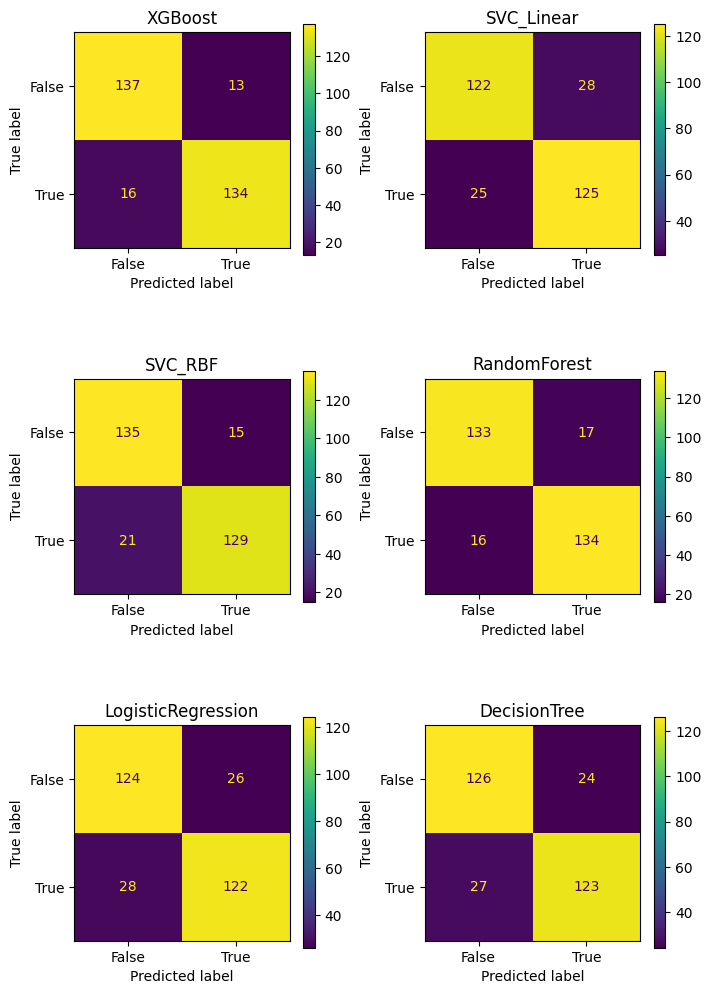

In [62]:
f, ax = plt.subplots(3, 2, figsize=(8, 12))
sk.metrics.ConfusionMatrixDisplay(conf_matrix_gcv_xgb, display_labels=[False, True]).plot(ax=ax[0, 0])
ax[0, 0].set_title("XGBoost")
sk.metrics.ConfusionMatrixDisplay(conf_matrix_gcv_svcl, display_labels=[False, True]).plot(ax=ax[0, 1])
ax[0, 1].set_title("SVC_Linear")
sk.metrics.ConfusionMatrixDisplay(conf_matrix_gcv_svcr, display_labels=[False, True]).plot(ax=ax[1, 0])
ax[1, 0].set_title("SVC_RBF")
sk.metrics.ConfusionMatrixDisplay(conf_matrix_gcv_rf, display_labels=[False, True]).plot(ax=ax[1, 1])
ax[1, 1].set_title("RandomForest")
sk.metrics.ConfusionMatrixDisplay(conf_matrix_gcv_lr, display_labels=[False, True]).plot(ax=ax[2, 0])
ax[2, 0].set_title("LogisticRegression")
sk.metrics.ConfusionMatrixDisplay(conf_matrix_gcv_dt, display_labels=[False, True]).plot(ax=ax[2, 1])
ax[2, 1].set_title("DecisionTree")

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

In [63]:
pd_gcv_xgb_sub = pd.DataFrame(gcv_xgb.predict(df_test), columns=['Solution'])
pd_gcv_xgb_sub.insert(0, 'Id', range(1, len(df_test) + 1))
pd_gcv_xgb_sub.to_csv('submission_gcv_xgb.csv', index=False)

pd_gcv_svcr_sub = pd.DataFrame(gcv_svcr.predict(df_test), columns=['Solution'])
pd_gcv_svcr_sub.insert(0, 'Id', range(1, len(df_test) + 1))
pd_gcv_svcr_sub.to_csv('submission_gcv_svcr.csv', index=False)

pd_gcv_rf_sub = pd.DataFrame(gcv_rf.predict(df_test), columns=['Solution'])
pd_gcv_rf_sub.insert(0, 'Id', range(1, len(df_test) + 1))
pd_gcv_rf_sub.to_csv('submission_gcv_rf.csv', index=False)

pd_gcv_svcl_sub = pd.DataFrame(gcv_svcl.predict(df_test), columns=['Solution'])
pd_gcv_svcl_sub.insert(0, 'Id', range(1, len(df_test) + 1))
pd_gcv_svcl_sub.to_csv('submission_gcv_svcl.csv', index=False)

pd_gcv_dt_sub = pd.DataFrame(gcv_dt.predict(df_test), columns=['Solution'])
pd_gcv_dt_sub.insert(0, 'Id', range(1, len(df_test) + 1))
pd_gcv_dt_sub.to_csv('submission_gcv_dt.csv', index=False)

pd_gcv_lr_sub = pd.DataFrame(gcv_lr.predict(df_test), columns=['Solution'])
pd_gcv_lr_sub.insert(0, 'Id', range(1, len(df_test) + 1))
pd_gcv_lr_sub.to_csv('submission_gcv_lr.csv', index=False)

---

In [64]:
c_rng = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
gammas = [0.001, 0.003, 0.005, 0.007, 0.009, 0.01]
params_xgb = {'max_depth': [x for x in range(10, 60, 10)], "min_child_weight" : [1], 'learning_rate': c_rng, 'n_estimators': [x for x in range(100, 600, 100)]}
params_svcr = {'kernel': ['rbf'], 'gamma': gammas, 'C': c_rng}
xg = xgboost.XGBClassifier()
svcrg = SVC()
xgb_gcv = GridSearchCV(xg, n_jobs=-1, param_grid=params_xgb, cv=10, verbose=0)
svcr_gcv = GridSearchCV(svcrg, n_jobs=-1, param_grid=params_svcr, cv=10, verbose=0)
svcr_gcv.fit(X_tr, y_tr)
xgb_gcv.fit(X_tr, y_tr)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0,
                                           100.0, 1000.0],
                         'max_depth': [10, 20, 30, 40, 50],
                         'min_child_weight': [1],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [65]:
scores_gcv_xgb = pd.DataFrame(xgb_gcv.cv_results_)
scores_gcv_svcr = pd.DataFrame(svcr_gcv.cv_results_)

In [66]:
scores_gcv_xgb[['params', 'mean_test_score','rank_test_score',
           'split0_test_score', 'split1_test_score', 'split2_test_score']].sort_values(by='rank_test_score', ascending=True)

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
99,"{'learning_rate': 0.1, 'max_depth': 50, 'min_c...",0.878571,1,0.857143,0.900000,0.871429
84,"{'learning_rate': 0.1, 'max_depth': 20, 'min_c...",0.878571,1,0.857143,0.900000,0.871429
77,"{'learning_rate': 0.1, 'max_depth': 10, 'min_c...",0.878571,1,0.857143,0.842857,0.885714
94,"{'learning_rate': 0.1, 'max_depth': 40, 'min_c...",0.878571,1,0.857143,0.900000,0.871429
89,"{'learning_rate': 0.1, 'max_depth': 30, 'min_c...",0.878571,1,0.857143,0.900000,0.871429
...,...,...,...,...,...,...
126,"{'learning_rate': 10.0, 'max_depth': 10, 'min_...",0.555714,196,0.471429,0.571429,0.485714
128,"{'learning_rate': 10.0, 'max_depth': 10, 'min_...",0.555714,196,0.471429,0.571429,0.485714
127,"{'learning_rate': 10.0, 'max_depth': 10, 'min_...",0.555714,196,0.471429,0.571429,0.485714
129,"{'learning_rate': 10.0, 'max_depth': 10, 'min_...",0.555714,196,0.471429,0.571429,0.485714


In [67]:
scores_gcv_svcr[['params', 'mean_test_score','rank_test_score',
           'split0_test_score', 'split1_test_score', 'split2_test_score']].sort_values(by='rank_test_score', ascending=True)

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
34,"{'C': 10.0, 'gamma': 0.009, 'kernel': 'rbf'}",0.875714,1,0.900000,0.885714,0.857143
35,"{'C': 10.0, 'gamma': 0.01, 'kernel': 'rbf'}",0.870000,2,0.900000,0.885714,0.842857
33,"{'C': 10.0, 'gamma': 0.007, 'kernel': 'rbf'}",0.870000,3,0.900000,0.885714,0.814286
32,"{'C': 10.0, 'gamma': 0.005, 'kernel': 'rbf'}",0.868571,4,0.900000,0.885714,0.814286
41,"{'C': 100.0, 'gamma': 0.01, 'kernel': 'rbf'}",0.857143,5,0.885714,0.885714,0.885714
47,"{'C': 1000.0, 'gamma': 0.01, 'kernel': 'rbf'}",0.857143,5,0.885714,0.885714,0.885714
40,"{'C': 100.0, 'gamma': 0.009, 'kernel': 'rbf'}",0.855714,7,0.885714,0.885714,0.885714
37,"{'C': 100.0, 'gamma': 0.003, 'kernel': 'rbf'}",0.855714,7,0.900000,0.857143,0.842857
46,"{'C': 1000.0, 'gamma': 0.009, 'kernel': 'rbf'}",0.855714,7,0.885714,0.885714,0.885714
39,"{'C': 100.0, 'gamma': 0.007, 'kernel': 'rbf'}",0.848571,10,0.871429,0.885714,0.871429


In [68]:
pd_gcv_xgb_2_sub = pd.DataFrame(xgb_gcv.predict(df_test), columns=['Solution'])
pd_gcv_xgb_2_sub.insert(0, 'Id', range(1, len(df_test) + 1))
pd_gcv_xgb_2_sub.to_csv('submission_gcv_xgb_2.csv', index=False)

pd_gcv_svcr_2_sub = pd.DataFrame(svcr_gcv.predict(df_test), columns=['Solution'])
pd_gcv_svcr_2_sub.insert(0, 'Id', range(1, len(df_test) + 1))
pd_gcv_svcr_2_sub.to_csv('submission_gcv_svcr_2.csv', index=False)

---

In [69]:
from sklearn.preprocessing import MinMaxScaler

In [70]:
df_mm = pd.DataFrame(MinMaxScaler().fit_transform(df))
df_mm

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,0.547689,0.320163,0.800065,0.348793,0.638821,0.528876,0.649860,0.594141,0.491822,0.511760,0.282362,0.666438,0.580700,0.774568,0.806980,0.499305,0.579527,0.538444,0.637340,0.899398,0.442124,0.505753,0.477825,0.672621,0.444328,0.425201,0.564878,0.615119,0.423391,0.280778,0.406288,0.352617,0.400488,0.518257,0.813164,0.575869,0.726477,0.108858,0.388353,0.540991
1,0.327488,0.540456,0.695430,0.332123,0.547881,0.470356,0.458765,0.669273,0.378280,0.398251,0.631456,0.657555,0.526793,0.419832,0.444467,0.585487,0.735764,0.862970,0.518188,0.583948,0.519918,0.610777,0.337430,0.453236,0.784782,0.195008,0.218153,0.466328,0.424814,0.326638,0.411223,0.447978,0.658593,0.545890,0.503160,0.529535,0.518918,0.672814,0.682393,0.409594
2,0.681106,0.434954,0.527012,0.187336,0.590833,0.509461,0.501315,0.167901,0.311670,0.226338,0.359533,0.634494,0.106155,0.942874,0.140251,0.334362,0.261547,0.479428,0.399918,0.677549,0.448363,0.296780,0.567122,0.652314,0.619690,0.421024,0.315101,0.457236,0.236728,0.371231,0.445806,0.558805,0.298666,0.607026,0.333030,0.214913,0.590963,0.592891,0.514923,0.738648
3,0.738047,0.411502,0.348957,0.436184,0.575146,0.636623,0.476653,0.807142,0.665146,0.248469,0.385866,0.471266,0.549040,0.284691,0.611859,0.204324,0.357486,0.437527,0.548755,0.598690,0.489413,0.708076,0.531593,0.551466,0.600513,0.620890,0.501492,0.608787,0.586651,0.639453,0.707288,0.637725,0.290694,0.304463,0.706572,0.708607,0.681780,0.529632,0.627185,0.663044
4,0.411336,0.402473,0.726456,0.523433,0.585868,0.493033,0.585006,0.162679,0.220047,0.533414,0.430089,0.560224,0.070029,0.438292,0.127934,0.367427,0.634845,0.049425,0.384695,0.498025,0.694467,0.748087,0.489194,0.586041,0.573259,0.523428,0.577705,0.566021,0.203953,0.095323,0.625499,0.175345,0.557251,0.439863,0.181230,0.224755,0.604102,0.623657,0.445334,0.562034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.456560,0.610362,0.332568,0.645776,0.538420,0.709915,0.618823,0.564587,0.479723,0.422949,0.617257,0.463780,0.276342,0.385278,0.442210,0.293663,0.773702,0.352411,0.489953,0.356327,0.447723,0.656886,0.583077,0.478872,0.444607,0.830327,0.685998,0.407591,0.421697,0.361180,0.446464,0.388537,0.572384,0.362175,0.334668,0.395552,0.483182,0.644948,0.389048,0.513861
996,0.225918,0.528383,0.601957,0.211660,0.706769,0.472457,0.183761,0.523471,0.247193,0.245435,0.526396,0.180193,0.748279,0.406680,0.682458,0.658179,0.457465,0.422679,0.751303,0.309755,0.607650,0.026501,0.311817,0.475984,0.194460,0.487497,0.730592,0.437482,0.494982,0.227057,0.601051,0.482219,0.465607,0.460726,0.318982,0.554655,0.235477,0.503929,0.785560,0.836239
997,0.639343,0.248454,0.314485,0.561601,0.879145,0.521467,0.335702,0.639719,0.439887,0.508593,0.772254,0.357190,0.474279,0.443492,0.764709,0.465874,0.477617,0.268221,0.551840,0.646500,0.561359,0.618596,0.594043,0.552015,0.674054,0.621369,0.462140,0.519810,0.403005,0.228735,0.735074,0.284918,0.339073,0.757796,0.223459,0.288081,0.278052,0.507492,0.647140,0.589792
998,0.867533,0.389569,0.342072,0.736808,0.176290,0.355518,0.668890,0.498646,0.593080,0.280819,0.572309,0.473391,0.609115,0.646882,0.159384,0.580664,0.520086,0.642085,0.262449,0.682258,0.461738,0.804096,0.409119,0.475502,0.209578,0.350407,0.326669,0.499684,0.680381,0.345697,0.906416,0.440240,0.574269,0.327945,0.740974,0.361292,0.168267,0.531642,0.415210,0.299723


In [71]:
X_tr, X_val, y_tr, y_val = train_test_split(df_mm, df_label, test_size=0.3, random_state=1)

In [72]:
c_rng = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
gammas = [0.001, 0.003, 0.005, 0.007, 0.009, 0.01]
params_xgb = {'max_depth': [x for x in range(10, 60, 10)], "min_child_weight" : [1], 'learning_rate': c_rng, 'n_estimators': [x for x in range(100, 600, 100)]}
params_svcr = {'kernel': ['rbf'], 'gamma': gammas, 'C': c_rng}
xg = xgboost.XGBClassifier()
svcrg = SVC()
xgb_mm_gcv = GridSearchCV(xg, n_jobs=-1, param_grid=params_xgb, cv=10, verbose=0)
svcr_mm_gcv = GridSearchCV(svcrg, n_jobs=-1, param_grid=params_svcr, cv=10, verbose=0)
svcr_mm_gcv.fit(X_tr, y_tr)
xgb_mm_gcv.fit(X_tr, y_tr)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0,
                                           100.0, 1000.0],
                         'max_depth': [10, 20, 30, 40, 50],
                         'min_child_weight': [1],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [73]:
xgb_mm_gcv.score(X_val, y_val)

0.9166666666666666

In [74]:
svcr_mm_gcv.score(X_val, y_val)

0.8433333333333334

In [75]:
pred_xg = xgb_mm_gcv.predict(X_val)
pred_svcrg = svcr_mm_gcv.predict(X_val)

In [76]:
print('XGB F1:',f1_score(y_val, pred_xg, pos_label = 0))
print('SVCR F1:',f1_score(y_val, pred_svcrg, pos_label = 0))

XGB F1: 0.9174917491749175
SVCR F1: 0.8417508417508417


In [77]:
pd_xgb_mm_sub = pd.DataFrame(xgb_mm_gcv.predict(df_test), columns=['Solution'])
pd_xgb_mm_sub.insert(0, 'Id', range(1, len(df_test) + 1))
pd_xgb_mm_sub.to_csv('submission_xgb_mm.csv', index=False)

pd_svcr_mm_sub = pd.DataFrame(svcr_mm_gcv.predict(df_test), columns=['Solution'])
pd_svcr_mm_sub.insert(0, 'Id', range(1, len(df_test) + 1))
pd_svcr_mm_sub.to_csv('submission_svcr_mm.csv', index=False)

---   
---